In [75]:
import pandas as pd
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [6]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i+n]

In [92]:
def plot_hist(filepath, axes=plt, max_sample=50, limits=(-np.inf, np.inf)):
    stats = pd.read_csv(filepath).sort(columns='sample_size', ascending =False)
    stats = stats[stats['sample_size'] <= max_sample]
    
    stats = stats[(stats['sample_size'] < limits[1]) & (stats['sample_size'] > limits[0])]
    # calculate normalization
    min_samplesize = stats.sample_size.min()
    max_samplesize = stats.sample_size.max()
    diff_samplesize = max_samplesize-min_samplesize
    print(max_samplesize)
    # generate color map
    colors = np.vectorize(create_colormap())
    axes.scatter(stats.distance_to_COM, stats.unique_combos, \
                 color=np.array(colors(stats.sample_size)).T, zorder=5,alpha=0.7)
    return stats
def plot_S(filepath, axes=plt, max_sample=50, limits=(-np.inf, np.inf)):
    stats = pd.read_csv(filepath).sort(columns='sample_size', ascending =False)
    stats = stats[stats['sample_size'] <= max_sample]
    
    stats = stats[(stats['sample_size'] < limits[1]) & (stats['sample_size'] > limits[0])]
    # calculate normalization
    min_samplesize = stats.sample_size.min()
    max_samplesize = stats.sample_size.max()
    diff_samplesize = max_samplesize-min_samplesize
    print(max_samplesize)
    # generate color map
    colors = np.vectorize(create_colormap())
    axes.scatter(stats.distance_to_COM, stats.S, \
                 color=np.array(colors(stats.sample_size)).T, zorder=5,alpha=0.5)
    return stats

def create_colormap(colormap_name='cubehelix_r', n_colors=8, use_range=(1,3,4,6,7,7), start_bin=2, each_bin=5, return_colormap=False):
    colors = sns.color_palette(colormap_name, n_colors=n_colors)
    bin_ = start_bin
    color_mapping = {}
    for color in use_range: #map through all colors
        for i in xrange(each_bin):
            color_mapping[bin_+i] = colors[color]
        bin_= bin_ + each_bin
    
    if return_colormap:
        return mpl.colors.ListedColormap([ colors[i] for i in use_range])
    def c_mapper(i):
        try:
            return color_mapping[i]
        except Exception as e:
            print('error')
            return color_mapping[sorted(color_mapping.keys())[-1]]
    return c_mapper

0
(0.81065432716524155, 0.92184470519847239, 0.9373759048616408)
1
(0.76389785476493899, 0.75726887694191825, 0.94940230233452083)
2
(0.82995767878942051, 0.5632024035248272, 0.77627444444444449)
3
(0.75766937518242217, 0.47696440257052414, 0.43775520971413712)
4
(0.45876197523191747, 0.48057366087571074, 0.19972785287539777)
5
(0.17004232121057963, 0.43679759647517291, 0.22372555555555557)
6
(0.082593859561937211, 0.27284810506762325, 0.30772012231798751)
7
(0.10361479515598847, 0.09497494261006123, 0.20622110711523323)


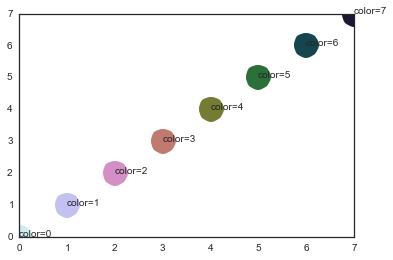

In [60]:
colors = sns.color_palette('cubehelix_r', n_colors=8)
for i,color in enumerate(colors):
    plt.plot(i,i, color=color, marker='o',markersize=25)
    print(i)
    print(color)
    plt.text(i,i,'color='+str(i))

28
30
30


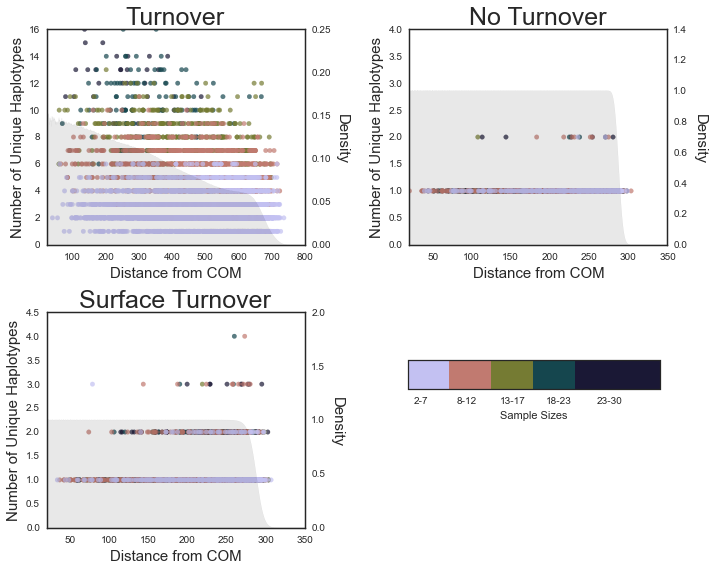

In [80]:
sns.set_style('white')
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(221)

r = np.load('./hist2/1_0_1/1_0_1_outs_r_meaned.npy')
rho = np.load('./hist2/1_0_1/1_0_1_outs_rho_corrected.npy')
ax1_r = ax1.twinx()
# ax1_r.plot(r,rho)
ax1_r.fill_between(r, rho,alpha=0.09,color=(0,0,0))
ax1_r.set_ylabel('Density', rotation=-90,labelpad=20, fontsize=15)

plot_hist('./Jul5/1_0_1_outs_2/pipe_out_Tue_Jul__5_13_00_18_2016/statistics.csv', ax1, max_sample=30)

ax1.set_xlim([20,800])
ax1.set_title('Turnover', fontsize=25)
ax1.set_xlabel('Distance from COM', fontsize=15)
ax1.set_ylabel('Number of Unique Haplotypes', fontsize=15)
ax1.set_ylim([0,16])

ax2 = fig.add_subplot(222)

r = np.load('./hist2/1_0_0/1_0_0_outs_r_meaned.npy')
rho = np.load('./hist2/1_0_0/1_0_0_outs_rho_corrected.npy')

ax2_r = ax2.twinx()
# ax2_r.plot(r,rho, zorder=1)
ax2_r.fill_between(r, rho,alpha=0.09,color=(0,0,0))
ax2_r.set_ylabel('Density', rotation=-90,labelpad=20, fontsize=15)


plot_hist('./Jul5/1_0_0_outs_3/pipe_out_Mon_Jul__4_20_54_51_2016/statistics.csv', ax2, max_sample=30)


ax2.set_title('No Turnover', fontsize=25)
ax2.set_xlabel('Distance from COM', fontsize=15)
ax2.set_ylim([0,4])
ax2.set_xlim([20,350])
ax2.set_ylabel('Number of Unique Haplotypes', fontsize=15)

ax3 = fig.add_subplot(223)
# ax3.set(zorder=5)
# ax3.
r = np.load('./hist2/1_1_1/1_1_1_outs_r_meaned.npy')
rho = np.load('./hist2/1_1_1/1_1_1_outs_rho_corrected.npy')
ax3_r = ax3.twinx()
# ax3_r.set(zorder=1)
# ax3_r.plot(r,rho)
ax3_r.fill_between(r, rho,alpha=0.09,color=(0,0,0))
ax3_r.set_ylabel('Density', rotation=-90, labelpad=20, fontsize=15)

plot_hist('./Jul5/1_1_1_outs_2/pipe_out_Tue_Jul__5_09_38_50_2016/statistics.csv', ax3, max_sample=30)


ax3.set_title('Surface Turnover', fontsize=25)
ax3.set_ylim([0,4.5])
ax3.set_xlim([20,350])
ax3.set_xlabel('Distance from COM', fontsize=15)
ax3.set_ylabel('Number of Unique Haplotypes', fontsize=15)

fig.tight_layout(pad=1, w_pad=2)
# sns.despine(top=True,left=False,right=False)

# cbar = fig.colorbar(ticks=[-1,0,1], orientation='horizontal')
# ax3 = fig.add_axes([0.05, -0.15, 0.1, 0.05])
ax4 = fig.add_subplot(224)
ax4.set_position([0.57, 0.318, 0.35,0.05])

cb = mpl.colorbar.ColorbarBase(ax4, cmap=create_colormap(return_colormap=True),
#                                 tick=['2-7', '8-13', '14-19', '20-25', '26-30'],
#                                 extend='both',
                                # Make the length of each extension
                                # the same as the length of the
                                # interior colors:
#                                 extendfrac='auto',
#                                 ticks=bounds,
                                spacing='uniform',
                                orientation='horizontal')
cb.set_label('Sample Sizes')
cb.set_ticks(list(np.linspace(0.05,0.6,4))+[0.8])
cb.set_ticklabels(['2-7', '8-12', '13-17', '18-23', '23-30'])
plt.savefig('test2.pdf', dpi=300)
plt.savefig('test2.svg', dpi=300)
plt.savefig('test2.png', dpi=300)

In [43]:
from scipy import stats

30
20
15
10
5


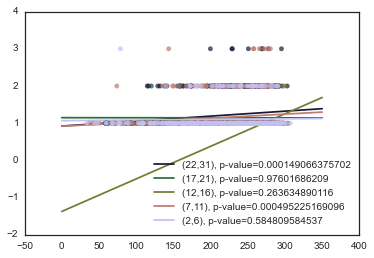

In [70]:
f = plt.figure()
ax = f.add_subplot(111)
data = plot_hist('./Jul5/1_1_1_outs_2/pipe_out_Tue_Jul__5_09_38_50_2016/statistics.csv', ax, max_sample=30, limits=(22,31))

slope, intercept, r_value, p_value, std_err = stats.linregress(data['distance_to_COM'],data['unique_combos'])
r = np.linspace(0,350,1000)
ax.plot(r, r*slope + intercept, color=(0.10361479515598847, 0.09497494261006123, 0.20622110711523323), label='(22,31), p-value='+str(p_value))

data = plot_hist('./Jul5/1_1_1_outs_2/pipe_out_Tue_Jul__5_09_38_50_2016/statistics.csv', ax, max_sample=30, limits=(17, 21))
slope, intercept, r_value, p_value, std_err = stats.linregress(data['distance_to_COM'],data['unique_combos'])
r = np.linspace(0,350,1000)
ax.plot(r, r*slope + intercept, color=(0.17004232121057963, 0.43679759647517291, 0.22372555555555557), label='(17,21), p-value='+str(p_value))


data = plot_hist('./Jul5/1_1_1_outs_2/pipe_out_Tue_Jul__5_09_38_50_2016/statistics.csv', ax, max_sample=30, limits=(12,16))
slope, intercept, r_value, p_value, std_err = stats.linregress(data['distance_to_COM'],data['unique_combos'])
r = np.linspace(0,350,1000)
ax.plot(r, r*slope + intercept, color=(0.45876197523191747, 0.48057366087571074, 0.19972785287539777), label='(12,16), p-value='+str(p_value))


data = plot_hist('./Jul5/1_1_1_outs_2/pipe_out_Tue_Jul__5_09_38_50_2016/statistics.csv', ax, max_sample=30, limits=(7,11))
slope, intercept, r_value, p_value, std_err = stats.linregress(data['distance_to_COM'],data['unique_combos'])
r = np.linspace(0,350,1000)
ax.plot(r, r*slope + intercept, color=(0.75766937518242217, 0.47696440257052414, 0.43775520971413712),  label='(7,11), p-value='+str(p_value))

data = plot_hist('./Jul5/1_1_1_outs_2/pipe_out_Tue_Jul__5_09_38_50_2016/statistics.csv', ax, max_sample=30, limits=(2,6))
slope, intercept, r_value, p_value, std_err = stats.linregress(data['distance_to_COM'],data['unique_combos'])
r = np.linspace(0,350,1000)
ax.plot(r, r*slope + intercept, color=(0.76389785476493899, 0.75726887694191825, 0.94940230233452083),  label='(2,6), p-value='+str(p_value))

ax.legend(loc='lower right')

28
20
15
10
5


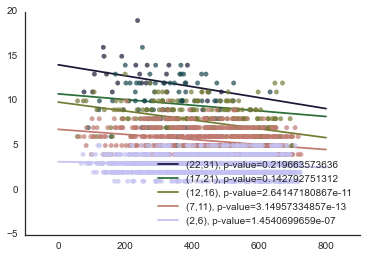

In [73]:
f = plt.figure()
ax = f.add_subplot(111)
file_ = './Jul5/1_0_1_outs_2/pipe_out_Tue_Jul__5_13_00_18_2016/statistics.csv'
r = np.linspace(0,800,1000)
data = plot_hist(file_, ax, max_sample=30, limits=(22,31))

slope, intercept, r_value, p_value, std_err = stats.linregress(data['distance_to_COM'],data['unique_combos'])

ax.plot(r, r*slope + intercept, color=(0.10361479515598847, 0.09497494261006123, 0.20622110711523323), label='(22,31), p-value='+str(p_value))

data = plot_hist(file_, ax, max_sample=30, limits=(17, 21))
slope, intercept, r_value, p_value, std_err = stats.linregress(data['distance_to_COM'],data['unique_combos'])

ax.plot(r, r*slope + intercept, color=(0.17004232121057963, 0.43679759647517291, 0.22372555555555557), label='(17,21), p-value='+str(p_value))


data = plot_hist(file_, ax, max_sample=30, limits=(12,16))
slope, intercept, r_value, p_value, std_err = stats.linregress(data['distance_to_COM'],data['unique_combos'])

ax.plot(r, r*slope + intercept, color=(0.45876197523191747, 0.48057366087571074, 0.19972785287539777), label='(12,16), p-value='+str(p_value))


data = plot_hist(file_, ax, max_sample=30, limits=(7,11))
slope, intercept, r_value, p_value, std_err = stats.linregress(data['distance_to_COM'],data['unique_combos'])

ax.plot(r, r*slope + intercept, color=(0.75766937518242217, 0.47696440257052414, 0.43775520971413712),  label='(7,11), p-value='+str(p_value))

data = plot_hist(file_, ax, max_sample=30, limits=(2,6))
slope, intercept, r_value, p_value, std_err = stats.linregress(data['distance_to_COM'],data['unique_combos'])

ax.plot(r, r*slope + intercept, color=(0.76389785476493899, 0.75726887694191825, 0.94940230233452083),  label='(2,6), p-value='+str(p_value))

ax.legend(loc='lower right')

sns.despine()

In [ ]:
start_bin = 2
each_bin = 5
bin_ = start_bin
for color in (1,3,4,6,7,7): #map through all colors
    print '-'
    for i in xrange(each_bin):
        print '->',bin_+i
    bin_= bin_ + each_bin

28
30
30


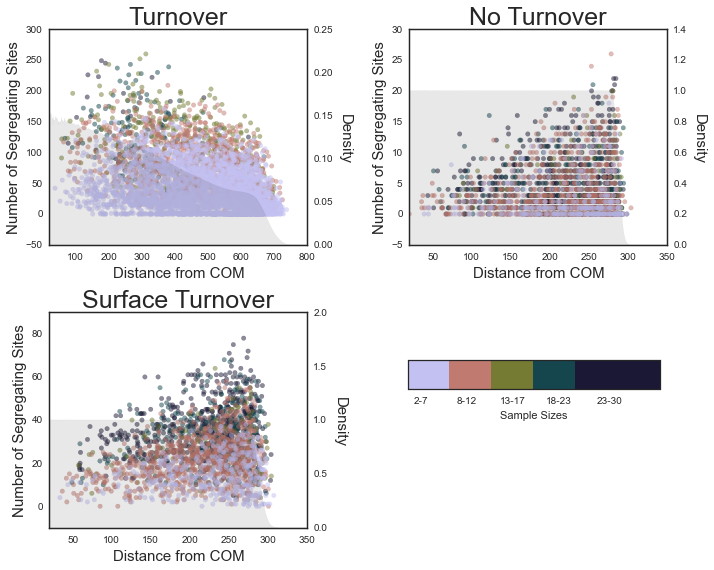

In [93]:
sns.set_style('white')
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(221)

r = np.load('./hist2/1_0_1/1_0_1_outs_r_meaned.npy')
rho = np.load('./hist2/1_0_1/1_0_1_outs_rho_corrected.npy')
ax1_r = ax1.twinx()
# ax1_r.plot(r,rho)
ax1_r.fill_between(r, rho,alpha=0.09,color=(0,0,0))
ax1_r.set_ylabel('Density', rotation=-90,labelpad=20, fontsize=15)

plot_S('./Jul5/1_0_1_outs_2/pipe_out_Tue_Jul__5_13_00_18_2016/statistics.csv', ax1, max_sample=30)

ax1.set_xlim([20,800])
ax1.set_title('Turnover', fontsize=25)
ax1.set_xlabel('Distance from COM', fontsize=15)
ax1.set_ylabel('Number of Segregating Sites', fontsize=15)
# ax1.set_ylim([0,16])

ax2 = fig.add_subplot(222)

r = np.load('./hist2/1_0_0/1_0_0_outs_r_meaned.npy')
rho = np.load('./hist2/1_0_0/1_0_0_outs_rho_corrected.npy')

ax2_r = ax2.twinx()
# ax2_r.plot(r,rho, zorder=1)
ax2_r.fill_between(r, rho,alpha=0.09,color=(0,0,0))
ax2_r.set_ylabel('Density', rotation=-90,labelpad=20, fontsize=15)


plot_S('./Jul5/1_0_0_outs_3/pipe_out_Mon_Jul__4_20_54_51_2016/statistics.csv', ax2, max_sample=30)


ax2.set_title('No Turnover', fontsize=25)
ax2.set_xlabel('Distance from COM', fontsize=15)
# ax2.set_ylim([0,4])
ax2.set_xlim([20,350])
ax2.set_ylabel('Number of Segregating Sites', fontsize=15)

ax3 = fig.add_subplot(223)
# ax3.set(zorder=5)
# ax3.
r = np.load('./hist2/1_1_1/1_1_1_outs_r_meaned.npy')
rho = np.load('./hist2/1_1_1/1_1_1_outs_rho_corrected.npy')
ax3_r = ax3.twinx()
# ax3_r.set(zorder=1)
# ax3_r.plot(r,rho)
ax3_r.fill_between(r, rho,alpha=0.09,color=(0,0,0))
ax3_r.set_ylabel('Density', rotation=-90, labelpad=20, fontsize=15)

plot_S('./Jul5/1_1_1_outs_2/pipe_out_Tue_Jul__5_09_38_50_2016/statistics.csv', ax3, max_sample=30)


ax3.set_title('Surface Turnover', fontsize=25)
# ax3.set_ylim([0,4.5])
ax3.set_xlim([20,350])
ax3.set_xlabel('Distance from COM', fontsize=15)
ax3.set_ylabel('Number of Segregating Sites', fontsize=15)

fig.tight_layout(pad=1, w_pad=2)
# sns.despine(top=True,left=False,right=False)

# cbar = fig.colorbar(ticks=[-1,0,1], orientation='horizontal')
# ax3 = fig.add_axes([0.05, -0.15, 0.1, 0.05])
ax4 = fig.add_subplot(224)
ax4.set_position([0.57, 0.318, 0.35,0.05])

cb = mpl.colorbar.ColorbarBase(ax4, cmap=create_colormap(return_colormap=True),
#                                 tick=['2-7', '8-13', '14-19', '20-25', '26-30'],
#                                 extend='both',
                                # Make the length of each extension
                                # the same as the length of the
                                # interior colors:
#                                 extendfrac='auto',
#                                 ticks=bounds,
                                spacing='uniform',
                                orientation='horizontal')
cb.set_label('Sample Sizes')
cb.set_ticks(list(np.linspace(0.05,0.6,4))+[0.8])
cb.set_ticklabels(['2-7', '8-12', '13-17', '18-23', '23-30'])
plt.savefig('test3.pdf', dpi=300)
plt.savefig('test3.svg', dpi=300)
plt.savefig('test3.png', dpi=300) 